This is an exploration of the performance of 
a color correction computed from one frame 
applied to a subsequent frame.

In [1]:
"""Run notebook from project root"""

import os
if os.path.split(os.getcwd())[-1] == "notebooks":
    %cd ..
print(f"Running notebook from {os.getcwd()}")

/Users/kincannonwilson/Desktop/School/Projection-Correction
Running notebook from /Users/kincannonwilson/Desktop/School/Projection-Correction


In [2]:
"""imports"""

import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.read_img import pathToCV2
from utils.transform_recorded import manual_perspective_transform
from helpers import show_img_in_subplots, show_single_img

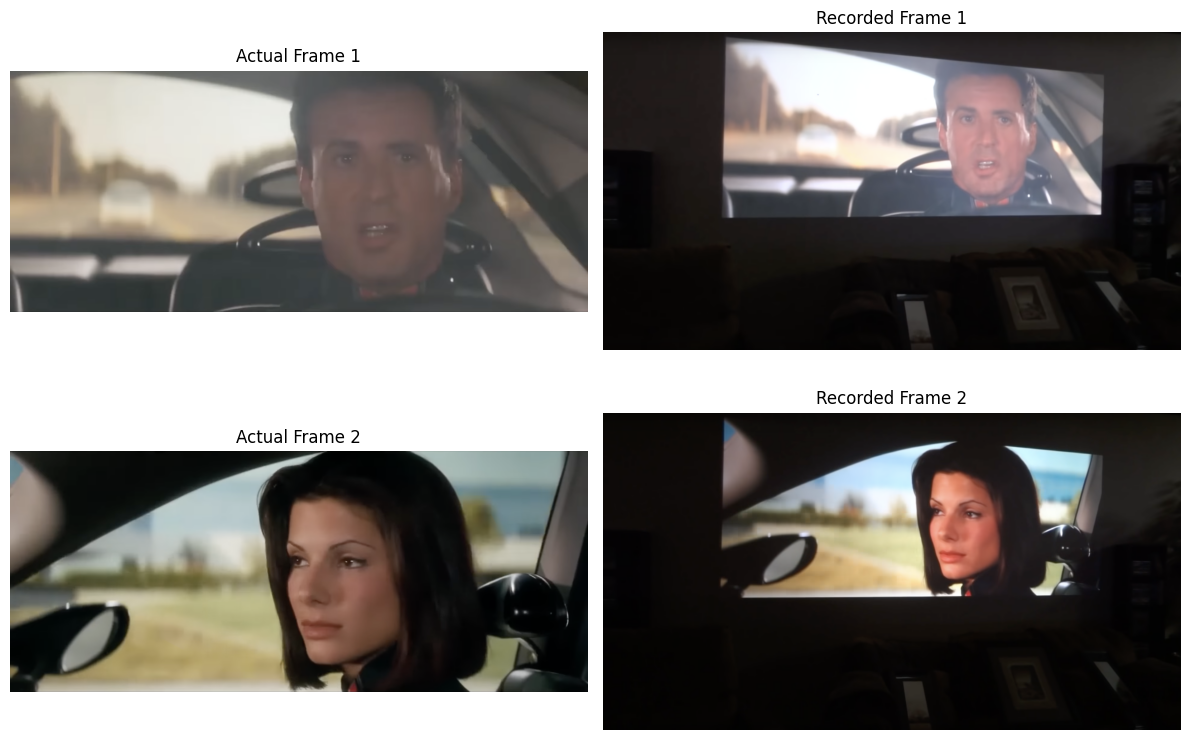

In [3]:
"""Start by showing the example images"""

# Paths to example files
actual_path_1 = os.path.join("inputs", "actual_example1.png")
recorded_path_1 = os.path.join("inputs", "recorded_example1.png")
actual_path_2 = os.path.join("inputs", "actual_example2.png")
recorded_path_2 = os.path.join("inputs", "recorded_example2.png")

# Open example files with OpenCV
actual_frame_1 = pathToCV2(actual_path_1)
recorded_frame_1 = pathToCV2(recorded_path_1)
actual_frame_2 = pathToCV2(actual_path_2)
recorded_frame_2 = pathToCV2(recorded_path_2)

# Display example images
images = [actual_frame_1, recorded_frame_1, actual_frame_2, recorded_frame_2]
titles = ["Actual Frame 1", "Recorded Frame 1", "Actual Frame 2", "Recorded Frame 2"]
show_img_in_subplots(images, titles, 2, 2, (12,8))

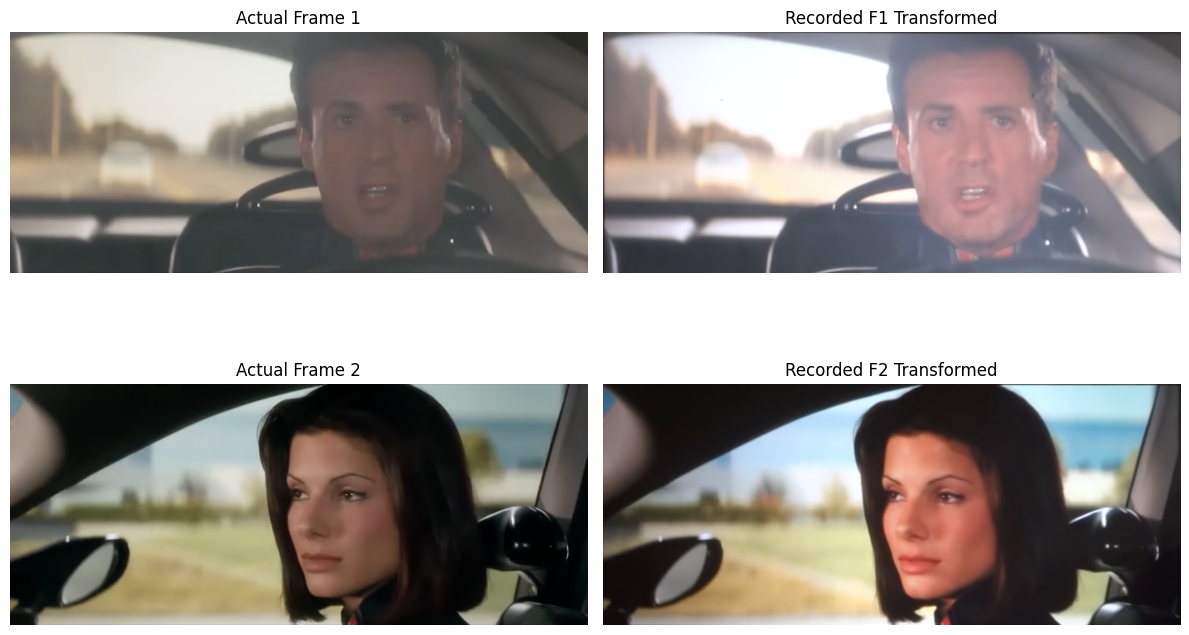

In [4]:
"""Crop recorded images and show result"""

# Transform recorded images using pre-specified points and perspective transform
points_frame_1 = np.array([(730, 37), (2995, 252), (2975, 1090), (703, 1110)], dtype=np.float32)
points_frame_2 = np.array([(730, 37), (2995, 252), (2975, 1090), (703, 1110)], dtype=np.float32)
frame_1_transformed = manual_perspective_transform(actual_frame_1, recorded_frame_1, points_frame_1)
frame_2_transformed = manual_perspective_transform(actual_frame_1, recorded_frame_2, points_frame_2)

# Show the results
images = [actual_frame_1, frame_1_transformed, actual_frame_2, frame_2_transformed]
titles = ["Actual Frame 1", "Recorded F1 Transformed", "Actual Frame 2", "Recorded F2 Transformed"]
show_img_in_subplots(images, titles, 2, 2, (12,8))

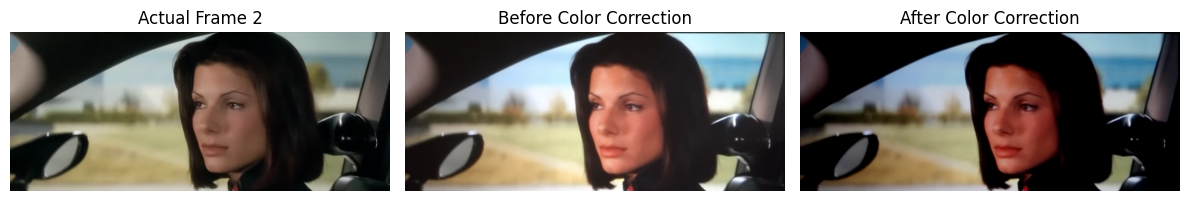

In [5]:
"""Perform color correction"""

# Calculate mean differences for each color channel
f1_red_diff = np.mean(actual_frame_1[:,:,0]) - np.mean(recorded_frame_1[:,:,0])
f1_green_diff = np.mean(actual_frame_1[:,:,1]) - np.mean(recorded_frame_1[:,:,1])
f1_blue_diff = np.mean(actual_frame_1[:,:,2]) - np.mean(recorded_frame_1[:,:,2])

# Apply differences to recorded frame 2 transformed
corrected_f2 = cv2.subtract(frame_2_transformed, (f1_red_diff, f1_green_diff, f1_blue_diff, 0))
f2_adjusted_clipped = np.clip(corrected_f2, 0, 255)
f2_clipped_uint8 = np.uint8(f2_adjusted_clipped)

# Show the result
images = [actual_frame_2, frame_2_transformed, f2_clipped_uint8]
titles = ["Actual Frame 2", "Before Color Correction", "After Color Correction"]
show_img_in_subplots(images, titles, 1, 3, (12,8))

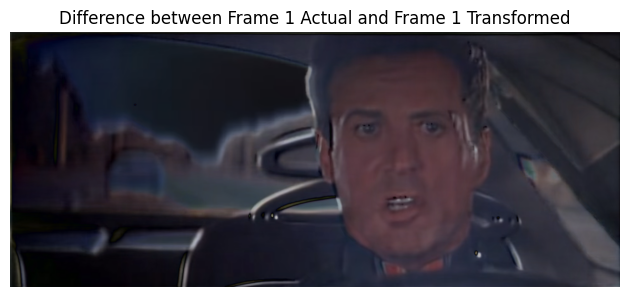

In [6]:
"""Exploration for why color correction didn't work"""

# Let's explore the difference between actual and recorded for frame 1
actual_frame_1_np = np.array(actual_frame_1, dtype=np.int32)
frame_1_transformed_np = np.array(frame_1_transformed, dtype=np.int32)
diff = np.abs(actual_frame_1 - frame_1_transformed_np)

# Show the difference
show_single_img(diff, "Difference between Frame 1 Actual and Frame 1 Transformed")

In the above image, we can see that a simple color correction won't 
work for this problem because the difference between the actual
and the transformed recorded image depends on the image
itself. Otherwise, we would observe one simple color in the 
image above.